## Health Data Reusability Project

This notebook is an informal investigation into the technologies needed to take the data contained in "open data" publications from the UK Department of Health. This will allow researchers to automate computations and respond more speedily to changes.

Some of this is ugly, some of it will doubtless be unnecessary, but it shows at least some of the preliminary work that goes into getting one's thinking straightened out about a particular program or set of programs.

Even this published product has been subject to much revision and polishing to eliminate simple experiments and code written purely to understand certain aspects of various package's behavior.
My bad habit is to delet this code before it is committed to a source control system, but I would recommend that you inculcate better habits than me.

In [1]:
import openpyxl as xl

Note that this software cannot read ".xls" files. `wb = xl.load_workbook("data/gpearnextime.xls")` raises an exception, so I toook the quick route and converted it to a ".xlsx" file with Excel before further processing.

It might be worth investigating the older `xlrd` module, which can read ".xls" files (though sadly there appears
to be no easy way to write them out as ".xslx" files which I had hoped `xlwt` might have provided. I suspect that there will be an easy fix for this, but I'll need to speak to Chris Withers. It may also be possible to simply use `openpyxl` for `.xlsx` files or `xlrd` for `.xls` files.

Since this is an experimental project, I punted on this issue and manually performed a function that does not seem amenable to early automation.

In [2]:
wb = xl.load_workbook("data/gpearnextime.xlsx")

/Users/sholden/Projects/HealthData/hd.env/lib/python3.4/site-packages/openpyxl/workbook/names/named_range.py:122: UserWarning: Discarded range with reserved name
  warnings.warn("Discarded range with reserved name")
/Users/sholden/Projects/HealthData/hd.env/lib/python3.4/site-packages/openpyxl/workbook/names/named_range.py:150: UserWarning: Invalid range_names: _A1, _Cal05, _Cc1, _Dd1, _Ee1, _Ff1, newname1, _xlnm.Print_Area, _xlnm.Print_Titles
  warnings.warn("Invalid range_names: "+", ".join(invalid_range_names))


In [3]:
wb.sheetnames

['Contents',
 'Definitions and Changes',
 '1a. GPMS Cash Terms ',
 '1b. GPMS Real Terms',
 'Real terms working - HIDE',
 '1c. GMS',
 '1d. PMS',
 '2a. GPMS Expenses',
 '2b. GMS Expenses',
 '2c. PMS Expenses',
 '3a. GPMS by Age ',
 '3b. GPMS by Age ',
 '4a. GPMS by Rurality ',
 '4b. GPMS by Rurality ',
 '5a. GPMS by Practice Size',
 '5b. GPMS by Practice Size',
 '6a. GPMS by SHA_GOR',
 '6b. GPMS by SHA_GOR ',
 '7a. GPMS by NHS ER',
 '7b. GPMS by NHS ER',
 '8. GPMS Distribution',
 '9a. All Salaried',
 '9b. Salaried by Country ',
 '9c. Salaried by Age',
 '9d. Salaried by Rurality',
 '9e. Salaried by SHA_GOR',
 '9f. Salaried by NHS ER',
 '10. Salaried Distribution ',
 '11. Combined GPs']

In [4]:
ws = wb.get_sheet_by_name('1a. GPMS Cash Terms ')

In [5]:
ws["B7"].value

'All Practice Types'

In [6]:
for i in range(1, 200):
    print(ws["B{}".format(i)].value, ws["C{}".format(i)].value)

Return to contents None
None None
GP EARNINGS AND EXPENSES 2002/03 TO 2012/13 CASH TERMS 
UK, ENGLAND, SCOTLAND, WALES, NORTHERN IRELAND None
None None
GPMS UK None
Practice Type Year
All Practice Types 2002/031
None 2003/041
None 2004/05
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/11
None 2011/12
None 2012/13
All Dispensing 2002/031
None 2003/041
None 2004/05
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/11
None 2011/12
None 2012/13
All Non-Dispensing 2002/031,2
None 2003/041,2
None 2004/05
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/11
None 2011/12
None 2012/13
None None
None None
GPMS ENGLAND None
Practice Type Year
All Practice Types 2002/03
None 2003/04
None 2004/05
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/11
None 2011/12
None 2012/13
All Dispensing 2002/03
None 2003/04
None 2004/053
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/

Note that the date values and the footnote numbers run together to give a single string value.
That means some parsing has to be applied to separate it into a `(date, footnote)` pair, whose
second member will be `None` if no notes apply.
From an openness point of view it would be much better to have a separate column for the footnotes that should be applied to the row.
Then again, from an openness point of view it would be better not to use Excel spreadsheets 

Turns out that may not be as useful as I thought. It would probably be eaiser to maintain the column values as part ofthe processing logic.

(This was borne out when I wrote a non-terminting loop when experimenting with the code below)

In [7]:
ws["B3"].value

'GP EARNINGS AND EXPENSES 2002/03 TO 2012/13 CASH TERMS \nUK, ENGLAND, SCOTLAND, WALES, NORTHERN IRELAND'

In [8]:
def year_refs(s):
    """Separate the year string into the year plus the list of references"""
    return s[:7], s[7:].split(",")

In [9]:
ws["d81"].value

'-'

In [10]:
def num_val(val):
    return 0 if val == "-" else val

In [11]:
num_val(32.456)

32.456

In [12]:
num_val("-")

0

In [13]:
3 == "banana"

False

In [14]:
cell = ws["B3"]

Probably a good idea to look at how we can find the relevant areas in a worksheet, then analyze the content of those areas (which will vary in size, increasing as the years go by.

In [15]:
ws["B3"].value # Sheet heading

'GP EARNINGS AND EXPENSES 2002/03 TO 2012/13 CASH TERMS \nUK, ENGLAND, SCOTLAND, WALES, NORTHERN IRELAND'

In [16]:
ws["B5"].value # Table heading

'GPMS UK'

In [17]:
cells = ws.get_cell_collection()

In [18]:
from collections import defaultdict

cols_in_row = defaultdict(list)

for cell in cells:
    if cell.value is not None:
        cols_in_row[cell.row].append(cell.column)

In [19]:
max_row = max(c for c in sorted(cols_in_row.keys()))
max_row

198

Note that cell J43 has a spurious value that should really be ignored. Wonder how long that's been there and who knows it is ...

In [20]:
cols_in_row[43].remove('J')
cols_in_row[43]

['B', 'E', 'D', 'F', 'C', 'G']

In [21]:
pixels = [] # straight list of pixel values for graphic
matrix = []
#print("  ".join(list("ABCDEFG"))) # Column headings
for row_num in range(max_row):
    cols = cols_in_row[row_num]
    row_string = []
    row_matrix = []
    for col_name in "ABCDEFG":
        row_string.append("*" if col_name in cols else " ")
        row_matrix.append(col_name in cols)
    #print("  ".join(row_string))
    matrix.append(row_matrix)
    pixels += [1-p for p in row_matrix] + [1]*7 # add pixel row plus blank row

In [22]:
from PIL import Image
im = Image.new("1", (7, 198*2))

In [23]:
im.putdata(pixels)

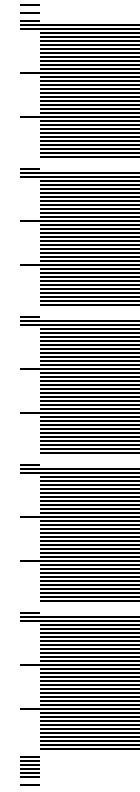

In [24]:
im.resize((7*20, 198*4))

This visualization makes the pattern of the tables more obvious.
Each table begubs with a row with a single cell, followed by two cells with six rows and a number of rows with five cells.
Now, it would be possible to construct a vector with the number of cells in each row, and then search
that for patterns characteristic of the start of a table.
Whenever you find yourself thinking "pattern," though, it's worth considering using Python's `re`
regular expression-based pattern-matching algorithm.
Since no row has more than seven cells we can construct a ___string of row lengths___ and then
use pattern matching to find the starting positions of the tables.
The task then simplifies to finding the string `"1665"`.

In [25]:
str_sizes = "".join(str(sum(x for x in row)) for row in matrix) # only works for widths up to 9 ...

In [26]:
import re
for m in re.finditer("(1665)", str_sizes):
    print(m.span()[0])

5
42
79
116
153


Maybe there's some easier way to determing the shape without all these complex manipulations.
I don't know about you, but I often find my second approach to a problem is more intelligent
than the first (that's why we are often recommended to write a prototype _and then throw it away_).
So consider everything above as prototypical, offering insight into the necessary analysis but using a horribly inefficient algorithm.

In [27]:
len(ws.columns)

16

In [28]:
col_counts =[sum(cell.value is not None for cell in column) for column in ws.columns]

In [29]:
valid_cols = [i for (i, ct) in  enumerate(col_counts) if ct > 1]
valid_cols

[1, 2, 3, 4, 5, 6]

In [30]:
row_counts =[sum(cell.value is not None for cell in row) for row in ws.rows]
valid_rows = [i for (i, ct) in  enumerate(row_counts) if ct > 0]
len(valid_rows)

185

In [31]:
ncols = len(valid_cols)
max_row_num = max(valid_rows)
pixels = []
row_counts = []
for row in range(max_row_num):
    cell_strings = []
    row_pixels = []
    for col in valid_cols:
        value = ws.rows[row][col].value
        row_pixels.append(value is None)
    pixels += row_pixels*3 + [1]*ncols # blank line
    row_counts.append(sum(1-pixel for pixel in row_pixels))

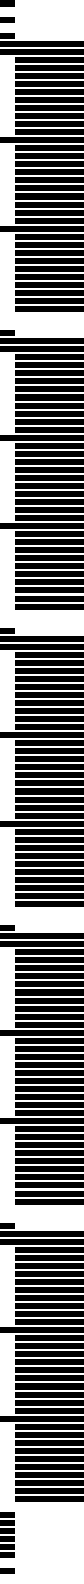

In [32]:
im = Image.new("1", (ncols, 4*(max_row_num)))
im.putdata(pixels)
im.resize((14*ncols, 8*(max_row_num+1)))

It appears that this techmique can be fairly effectively used to get an idea of the shape of a worksheet.
The next step will be to turn that into a function with the worksheet as a parameter, and apply it to all the sheets on a workbook.

In [33]:
%matplotlib inline

In [34]:
def visualize(ws):
    col_counts =[sum(cell.value is not None for cell in column) for column in ws.columns]
    valid_cols = [i for (i, ct) in  enumerate(col_counts) if ct > 1]
    row_counts =[sum(cell.value is not None for cell in row) for row in ws.rows]
    valid_rows = [i for (i, ct) in  enumerate(row_counts) if ct > 0]
    ncols = len(valid_cols)
    max_row_num = max(valid_rows)
    pixels = []
    row_counts = []
    for row in range(max_row_num):
        cell_strings = []
        row_pixels = []
        for col in valid_cols:
            value = ws.rows[row][col].value
            row_pixels.append(value is None)
        pixels += row_pixels*3 + [1]*ncols # blank line
        row_counts.append(sum(1-pixel for pixel in row_pixels))
    im = Image.new("1", (ncols, 4*(max_row_num)))
    im.putdata(pixels)
    return im.resize((14*ncols, 8*(max_row_num+1))), row_counts

In [35]:
images = []; row_counts = []
for ws in wb.worksheets:
    if ws.sheet_state != "hidden": # exclude hidden sheets
        image, counts = visualize(ws)
        images.append(image)
        row_counts.append(counts)

In [36]:
LEFT_MARGIN = 4
im_width = sum(i.size[0] for i in images)+(len(images)-1)*LEFT_MARGIN
im_height = max(i.size[1] for i in images)
im_width, im_height

(3370, 2680)

In [37]:
len(row_counts)

28

In [38]:
table_widths = [max(c) for c in row_counts]

In [39]:
x_offset = 0
big_image = Image.new("1", (im_width, im_height), 1)
for i, im in enumerate(images):
    big_image.paste(im, (x_offset, 0))
    x_offset += im.size[0]+LEFT_MARGIN

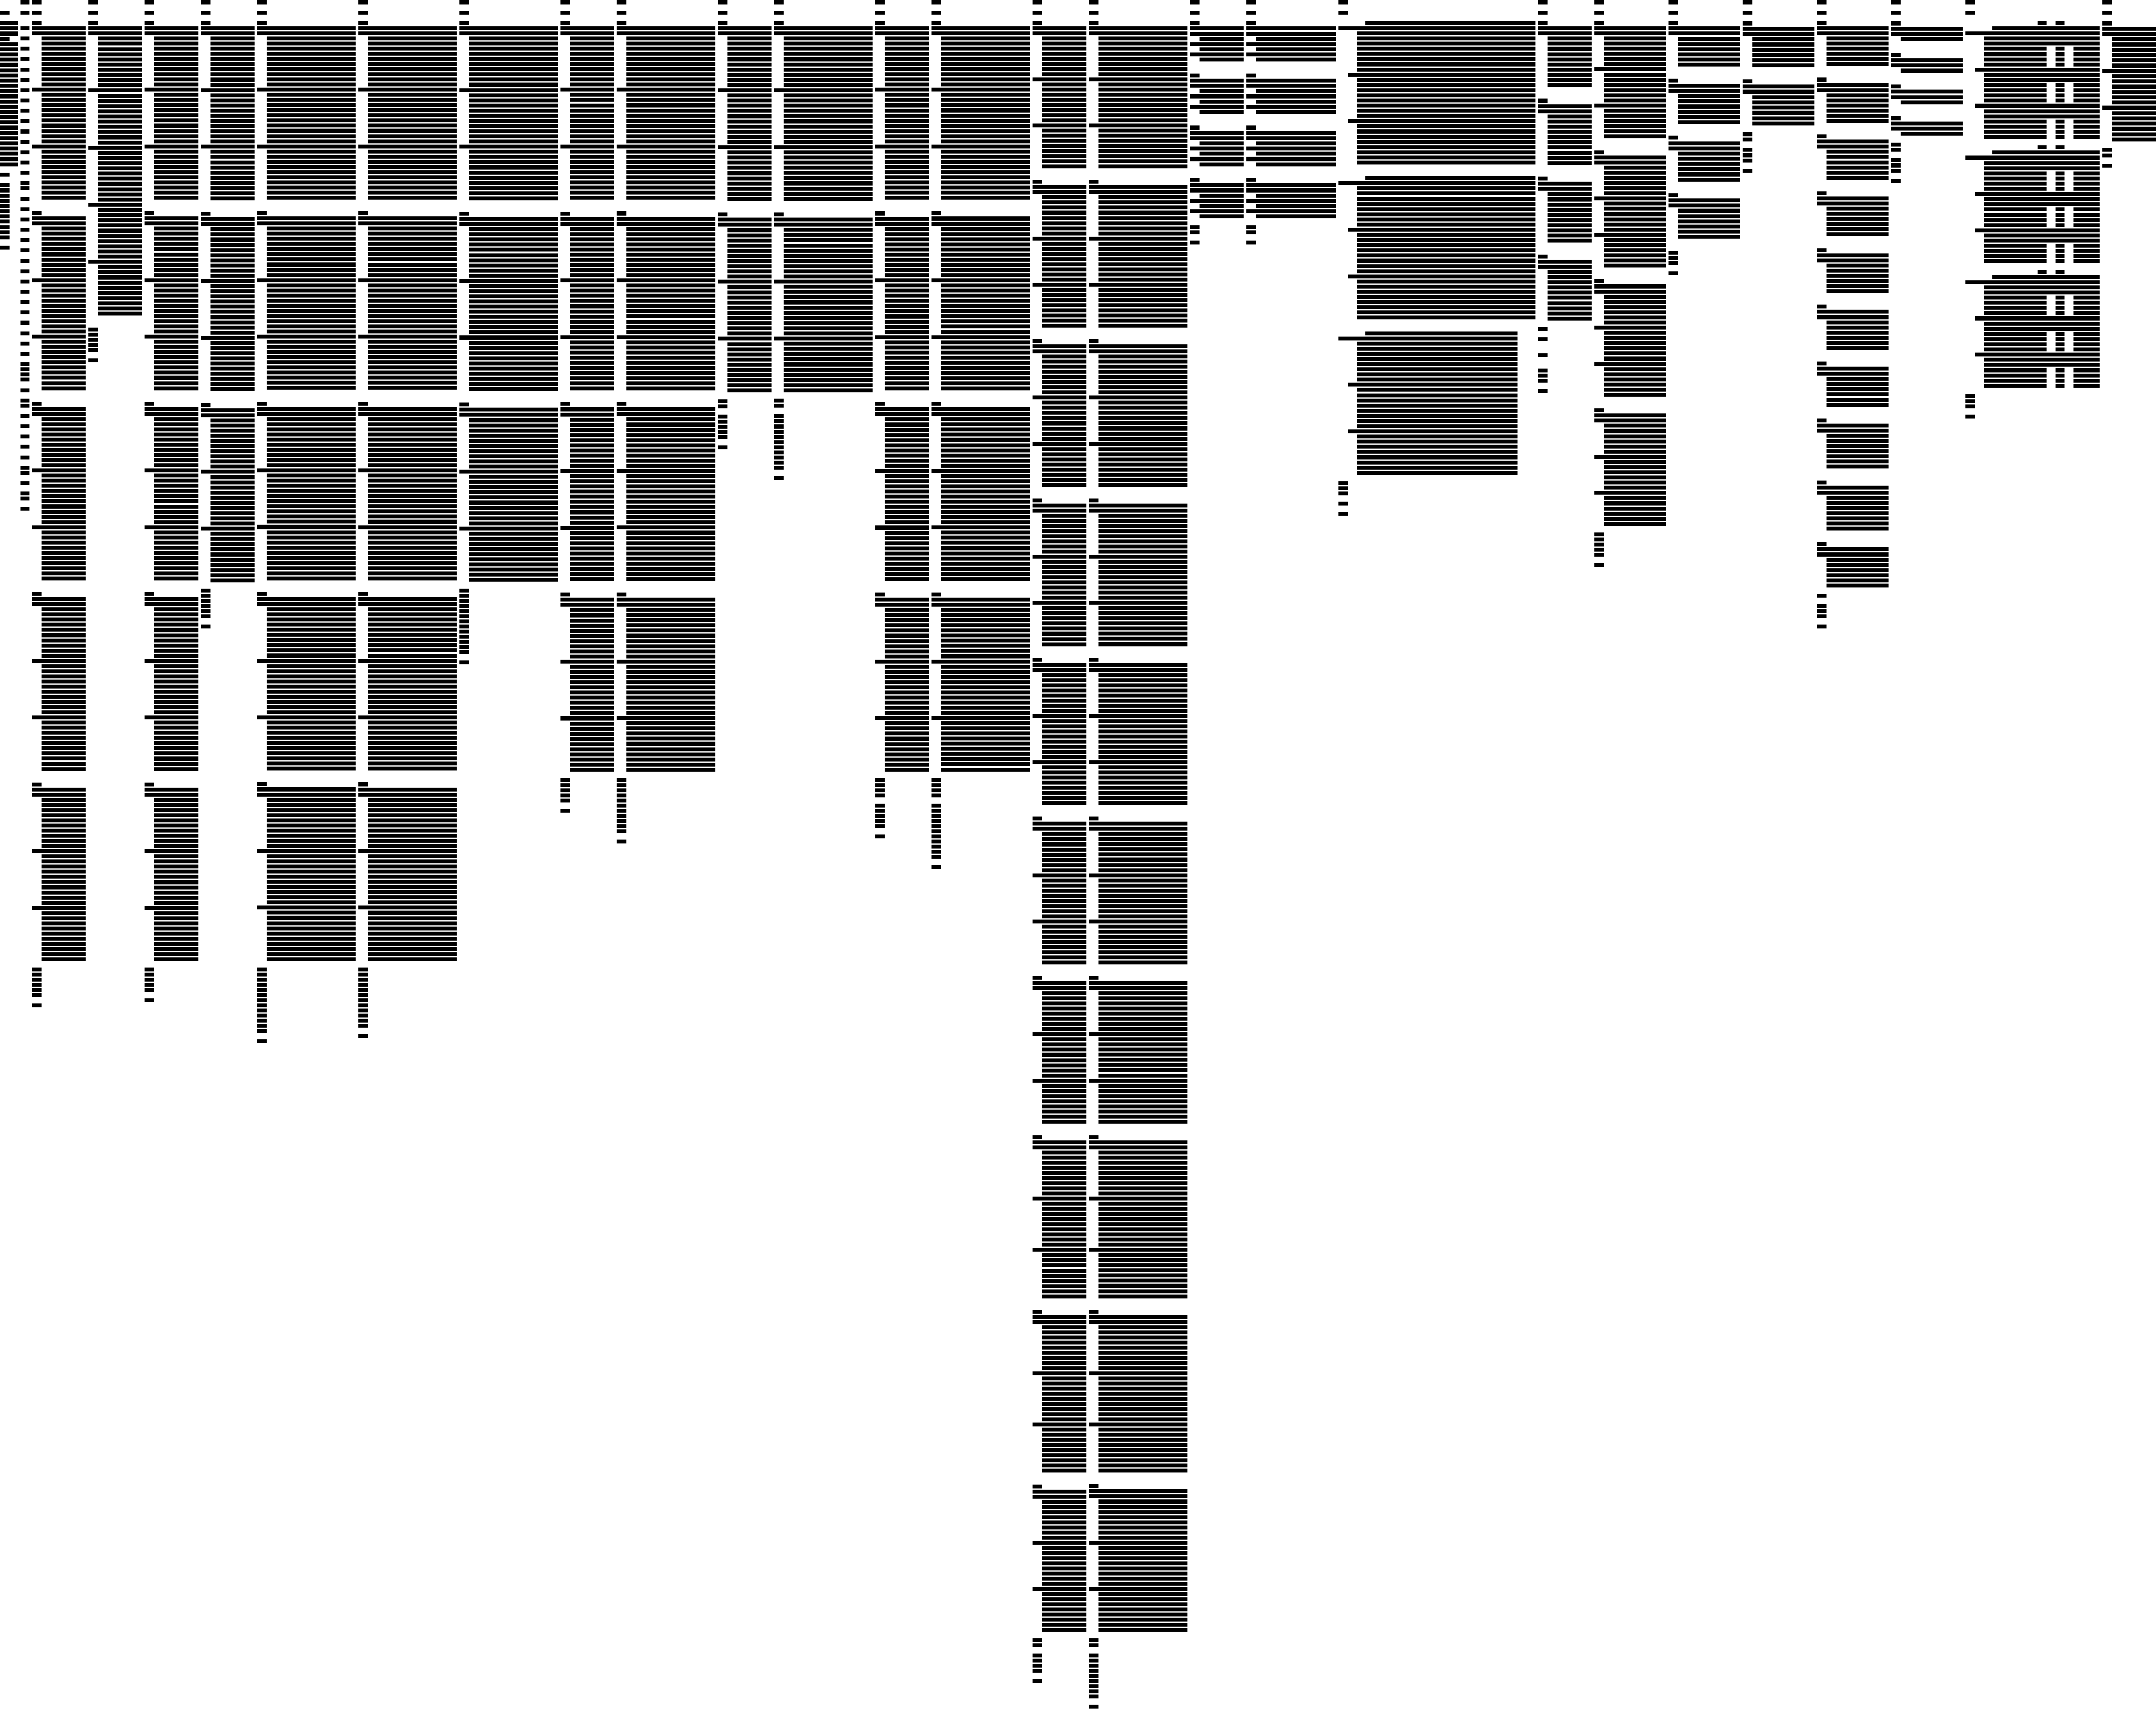

In [40]:
big_image

In [41]:
ws = wb.worksheets[2]
ws

<Worksheet "1a. GPMS Cash Terms ">

In [42]:
# Page header is in B3 always?
page_header = ws["B3"].value
print(page_header)

GP EARNINGS AND EXPENSES 2002/03 TO 2012/13 CASH TERMS 
UK, ENGLAND, SCOTLAND, WALES, NORTHERN IRELAND


In [43]:
counts_string = "".join(str(n) for n in row_counts[2])
counts_string

'10101665555555555655555555556555555555500166555555555565555555555655555555550016655555555556555555555565555555555001665555555555655555555556555555555500166555555555565555555555655555555550111111010'

Looking for the pattern `"1665"`\* in `counts_string` finds a six-column table.
The first line is the name of the table.
The second line is the column headings.
The remainder of the table is a number of repeating groups.
The first column is special because unchanged values aren't repeated (which is why subsequent lines only have five elements).
While this is helpful for the human reader's comprehension it has to be corrected for the computer.

\* Yes, this is a fix - that string was chosen because I knew there were six columns in the tables.
We may or may not get to the computation of the number of columns later.

In [44]:
table_starts = [x.start(0) for x in re.finditer("1665", counts_string)] # assumes table_length known
table_starts

[4, 41, 78, 115, 152]

In [45]:
table_lens = [x.end("X")-x.start("X") for x in re.finditer("16(?P<X>65[56]+)", counts_string)]
table_lens

[33, 33, 33, 33, 33]

In [46]:
number_of_tables = len(table_starts)
number_of_tables

5

Let's do a little work on the first table.
Also, let's learn how to access the elements we need in order to construct a usable data source.
The crucial facts for each table are the number of groups, the number of rows in each group
and the number of columns in the table.
When you think about it this is simply a description of a three-dimensional structure.
The first table reports figures over the whole UK.
The remainder analyze that information geographically, adding a fourth dimension to the data.

Let's do a little work on the first table to learn what we'll need to do in the general case.

Firstly, let's see how to access the various "chunks" of the table, beginning with its title.

In [47]:
start_row = table_starts[0]
table_len = table_lens[0]
ws["B5"].value, ws["B5"], ws.columns[1][4], ws.columns[1][start_row]

('GPMS UK',
 <Cell 1a. GPMS Cash Terms .B5>,
 <Cell 1a. GPMS Cash Terms .B5>,
 <Cell 1a. GPMS Cash Terms .B5>)

In [48]:
title_cell = ws.columns[1][start_row]
title_cell.value

'GPMS UK'

Next we need to extract the column names, which are on the row following the title.

In [49]:
table_cols = 6
# was int(counts_string[start_row+1]), but that depended on arcane knowledge in the building of the pattern
headers = [c.value for c in ws.rows[start_row+1][1:table_cols+1]] # really should have computed that "6" from the pattern ...
headers

['Practice Type',
 'Year',
 'Estimated Population',
 'Gross Earnings',
 'Total Expenses',
 'Income Before Tax']

In [50]:
# This is a cheesy way to work out how many groups there are
pat = "(?P<X>(65+)+)"
m = re.search(pat, counts_string, start_row+2)
assert m.groups(0)[0].replace(m.groups(0)[1], "") == "" # only true for fixed groups

In [51]:
group_count = len(m.groups(0)[0])//len(m.groups(0)[1])
group_count

3

In [52]:
group_len = table_len//group_count
group_len

11

In [53]:
import pandas as pd
first_data_row = start_row+2
dataframes = []
for data_start_row in range(first_data_row, first_data_row+table_len, group_len):
    group_cells = [[ws.rows[row][col].value for col in range(1, table_cols+1)]
                   for row in range(data_start_row, data_start_row+group_len)]
    group = pd.DataFrame(group_cells, columns=headers)
    group[headers[0]] = group[headers[0]][0]
    dataframes.append(group)

In [54]:
big_frame = pd.concat(dataframes)

In [55]:
big_frame.index = range(table_len)

In [56]:
big_frame

Practice Type        Year Estimated Population Gross Earnings  \
0   All Practice Types    2002/031                31362         184154   
1   All Practice Types    2003/041             31594.98       203613.5   
2   All Practice Types     2004/05             33887.99       230096.7   
3   All Practice Types     2005/06             33874.98       245019.6   
4   All Practice Types     2006/07                33887       247361.6   
5   All Practice Types     2007/08                33622       251997.3   
6   All Practice Types     2008/09                33371         258600   
7   All Practice Types     2009/10                33050         262700   
8   All Practice Types     2010/11                33000         266500   
9   All Practice Types     2011/12                32950         267900   
10  All Practice Types     2012/13                32850         271800   
11      All Dispensing    2002/031                 4851         271003   
12      All Dispensing    2003/041              5233.81       286133.3   
13      All Dispensing     2004/05              5329.23       317973.9   
14      All Dispensing     2005/06               5303.1       331894.9   
15      All Dispensing     2006/07                 5288       330790.8   
16      All Dispensing     2007/08                 5121       338498.9   
17      All Dispensing     2008/09                 4910         346800   
18      All Dispensing     2009/10                 4850         348200   
19      All Dispensing     2010/11                 5050         356500   
20      All Dispensing     2011/12                 5000         357800   
21      All Dispensing     2012/13                 4900         360400   
22  All Non-Dispensing  2002/031,2                    -              -   
23  All Non-Dispensing  2003/041,2                    -              -   
24  All Non-Dispensing     2004/05             28558.76       213738.3   
25  All Non-Dispensing     2005/06             28571.88       228319.4   
26  All Non-Dispensing     2006/07                28599       231935.4   
27  All Non-Dispensing     2007/08                28501       236454.8   
28  All Non-Dispensing     2008/09                28461         243400   
29  All Non-Dispensing     2009/10                28200         248000   
30  All Non-Dispensing     2010/11                27950         250300   
31  All Non-Dispensing     2011/12                27950         251900   
32  All Non-Dispensing     2012/13                27900         256200   

   Total Expenses Income Before Tax  
0          111439             72716  
1        121594.8          82018.71  
2        129926.2          100169.5  
3          135016          110003.6  
4        139694.4          107667.2  
5        145925.4          106071.9  
6          153300            105300  
7          156900            105700  
8          162400            104100  
9          164900            103000  
10         169700            102000  
11         183830             87172  
12       188593.1          97540.19  
13       198418.1          119555.8  
14       204833.9            127061  
15       203794.5          126996.3  
16       213334.2          125164.7  
17         225400            121500  
18         226800            121400  
19         237700            118800  
20         241900            115900  
21         246100            114300  
22              -                 -  
23              -                 -  
24       117145.2          96593.08  
25       121638.9          106680.5  
26       127842.2          104093.2  
27       133813.5          102641.3  
28         140900            102500  
29         145000            103000  
30         148900            101500  
31         151200            100700  
32         156300             99900

In [57]:
import numpy as np
big_frame["Estimated Population"][22:33].replace("-", np.NaN).interpolate()

22         NaN
23         NaN
24    28558.76
25    28571.88
26    28599.00
27    28501.00
28    28461.00
29    28200.00
30    27950.00
31    27950.00
32    27900.00
Name: Estimated Population, dtype: float64

In [58]:
big_frame

Practice Type        Year Estimated Population Gross Earnings  \
0   All Practice Types    2002/031                31362         184154   
1   All Practice Types    2003/041             31594.98       203613.5   
2   All Practice Types     2004/05             33887.99       230096.7   
3   All Practice Types     2005/06             33874.98       245019.6   
4   All Practice Types     2006/07                33887       247361.6   
5   All Practice Types     2007/08                33622       251997.3   
6   All Practice Types     2008/09                33371         258600   
7   All Practice Types     2009/10                33050         262700   
8   All Practice Types     2010/11                33000         266500   
9   All Practice Types     2011/12                32950         267900   
10  All Practice Types     2012/13                32850         271800   
11      All Dispensing    2002/031                 4851         271003   
12      All Dispensing    2003/041              5233.81       286133.3   
13      All Dispensing     2004/05              5329.23       317973.9   
14      All Dispensing     2005/06               5303.1       331894.9   
15      All Dispensing     2006/07                 5288       330790.8   
16      All Dispensing     2007/08                 5121       338498.9   
17      All Dispensing     2008/09                 4910         346800   
18      All Dispensing     2009/10                 4850         348200   
19      All Dispensing     2010/11                 5050         356500   
20      All Dispensing     2011/12                 5000         357800   
21      All Dispensing     2012/13                 4900         360400   
22  All Non-Dispensing  2002/031,2                    -              -   
23  All Non-Dispensing  2003/041,2                    -              -   
24  All Non-Dispensing     2004/05             28558.76       213738.3   
25  All Non-Dispensing     2005/06             28571.88       228319.4   
26  All Non-Dispensing     2006/07                28599       231935.4   
27  All Non-Dispensing     2007/08                28501       236454.8   
28  All Non-Dispensing     2008/09                28461         243400   
29  All Non-Dispensing     2009/10                28200         248000   
30  All Non-Dispensing     2010/11                27950         250300   
31  All Non-Dispensing     2011/12                27950         251900   
32  All Non-Dispensing     2012/13                27900         256200   

   Total Expenses Income Before Tax  
0          111439             72716  
1        121594.8          82018.71  
2        129926.2          100169.5  
3          135016          110003.6  
4        139694.4          107667.2  
5        145925.4          106071.9  
6          153300            105300  
7          156900            105700  
8          162400            104100  
9          164900            103000  
10         169700            102000  
11         183830             87172  
12       188593.1          97540.19  
13       198418.1          119555.8  
14       204833.9            127061  
15       203794.5          126996.3  
16       213334.2          125164.7  
17         225400            121500  
18         226800            121400  
19         237700            118800  
20         241900            115900  
21         246100            114300  
22              -                 -  
23              -                 -  
24       117145.2          96593.08  
25       121638.9          106680.5  
26       127842.2          104093.2  
27       133813.5          102641.3  
28         140900            102500  
29         145000            103000  
30         148900            101500  
31         151200            100700  
32         156300             99900

In [59]:
js = big_frame.to_json()

In [60]:
pd.read_json(js)[headers].sort()

Practice Type        Year Estimated Population Gross Earnings  \
0   All Practice Types    2002/031                31362         184154   
1   All Practice Types    2003/041             31594.98       203613.5   
2   All Practice Types     2004/05             33887.99       230096.7   
3   All Practice Types     2005/06             33874.98       245019.6   
4   All Practice Types     2006/07                33887       247361.6   
5   All Practice Types     2007/08                33622       251997.3   
6   All Practice Types     2008/09                33371         258600   
7   All Practice Types     2009/10                33050         262700   
8   All Practice Types     2010/11                33000         266500   
9   All Practice Types     2011/12                32950         267900   
10  All Practice Types     2012/13                32850         271800   
11      All Dispensing    2002/031                 4851         271003   
12      All Dispensing    2003/041              5233.81       286133.3   
13      All Dispensing     2004/05              5329.23       317973.9   
14      All Dispensing     2005/06               5303.1       331894.9   
15      All Dispensing     2006/07                 5288       330790.8   
16      All Dispensing     2007/08                 5121       338498.9   
17      All Dispensing     2008/09                 4910         346800   
18      All Dispensing     2009/10                 4850         348200   
19      All Dispensing     2010/11                 5050         356500   
20      All Dispensing     2011/12                 5000         357800   
21      All Dispensing     2012/13                 4900         360400   
22  All Non-Dispensing  2002/031,2                    -              -   
23  All Non-Dispensing  2003/041,2                    -              -   
24  All Non-Dispensing     2004/05             28558.76       213738.3   
25  All Non-Dispensing     2005/06             28571.88       228319.4   
26  All Non-Dispensing     2006/07                28599       231935.4   
27  All Non-Dispensing     2007/08                28501       236454.8   
28  All Non-Dispensing     2008/09                28461         243400   
29  All Non-Dispensing     2009/10                28200         248000   
30  All Non-Dispensing     2010/11                27950         250300   
31  All Non-Dispensing     2011/12                27950         251900   
32  All Non-Dispensing     2012/13                27900         256200   

   Total Expenses Income Before Tax  
0          111439             72716  
1        121594.8          82018.71  
2        129926.2          100169.5  
3          135016          110003.6  
4        139694.4          107667.2  
5        145925.4          106071.9  
6          153300            105300  
7          156900            105700  
8          162400            104100  
9          164900            103000  
10         169700            102000  
11         183830             87172  
12       188593.1          97540.19  
13       198418.1          119555.8  
14       204833.9            127061  
15       203794.5          126996.3  
16       213334.2          125164.7  
17         225400            121500  
18         226800            121400  
19         237700            118800  
20         241900            115900  
21         246100            114300  
22              -                 -  
23              -                 -  
24       117145.2          96593.08  
25       121638.9          106680.5  
26       127842.2          104093.2  
27       133813.5          102641.3  
28         140900            102500  
29         145000            103000  
30         148900            101500  
31         151200            100700  
32         156300             99900

In [61]:
tf = pd.read_json(js)[headers].sort()[headers[2:]].replace("-", np.NaN) \
            -big_frame[headers[2:]] .replace("-", np.NaN)>1e-10

In [62]:
big_frame[headers[2:]][tf[headers[2:]]]

Estimated Population Gross Earnings Total Expenses Income Before Tax
0                   NaN            NaN            NaN               NaN
1                   NaN            NaN            NaN               NaN
2                   NaN            NaN            NaN               NaN
3                   NaN            NaN            NaN               NaN
4                   NaN            NaN            NaN               NaN
5                   NaN            NaN            NaN               NaN
6                   NaN            NaN            NaN               NaN
7                   NaN            NaN            NaN               NaN
8                   NaN            NaN            NaN               NaN
9                   NaN            NaN            NaN               NaN
10                  NaN            NaN            NaN               NaN
11                  NaN            NaN            NaN               NaN
12                  NaN            NaN            NaN               NaN
13                  NaN            NaN            NaN               NaN
14                  NaN            NaN            NaN               NaN
15                  NaN            NaN            NaN               NaN
16                  NaN            NaN            NaN               NaN
17                  NaN            NaN            NaN               NaN
18                  NaN            NaN            NaN               NaN
19                  NaN            NaN            NaN               NaN
20                  NaN            NaN            NaN               NaN
21                  NaN            NaN            NaN               NaN
22                  NaN            NaN            NaN               NaN
23                  NaN            NaN            NaN               NaN
24                  NaN            NaN            NaN               NaN
25                  NaN            NaN            NaN               NaN
26                  NaN            NaN            NaN               NaN
27                  NaN            NaN            NaN               NaN
28                  NaN            NaN            NaN               NaN
29                  NaN            NaN            NaN               NaN
30                  NaN            NaN            NaN               NaN
31                  NaN            NaN            NaN               NaN
32                  NaN            NaN            NaN               NaN

In [63]:
big_frame[headers[2:]]

Estimated Population Gross Earnings Total Expenses Income Before Tax
0                 31362         184154         111439             72716
1              31594.98       203613.5       121594.8          82018.71
2              33887.99       230096.7       129926.2          100169.5
3              33874.98       245019.6         135016          110003.6
4                 33887       247361.6       139694.4          107667.2
5                 33622       251997.3       145925.4          106071.9
6                 33371         258600         153300            105300
7                 33050         262700         156900            105700
8                 33000         266500         162400            104100
9                 32950         267900         164900            103000
10                32850         271800         169700            102000
11                 4851         271003         183830             87172
12              5233.81       286133.3       188593.1          97540.19
13              5329.23       317973.9       198418.1          119555.8
14               5303.1       331894.9       204833.9            127061
15                 5288       330790.8       203794.5          126996.3
16                 5121       338498.9       213334.2          125164.7
17                 4910         346800         225400            121500
18                 4850         348200         226800            121400
19                 5050         356500         237700            118800
20                 5000         357800         241900            115900
21                 4900         360400         246100            114300
22                    -              -              -                 -
23                    -              -              -                 -
24             28558.76       213738.3       117145.2          96593.08
25             28571.88       228319.4       121638.9          106680.5
26                28599       231935.4       127842.2          104093.2
27                28501       236454.8       133813.5          102641.3
28                28461         243400         140900            102500
29                28200         248000         145000            103000
30                27950         250300         148900            101500
31                27950         251900         151200            100700
32                27900         256200         156300             99900

In [64]:
rl_charset = "0123456789abcdefghijklmnopqrstuvwxyz"

def rl_dig(i):
    return rl_charset[i]

def dig_rl(c):
    return rl_charset.index(c)

# testing, even!
for c in rl_charset:
    assert rl_dig(dig_rl(c)) == c

for i in range(len(rl_charset)):
    assert dig_rl(rl_dig(i)) == i

In [65]:
def extract_tables(ws):
    import pandas as pd
    if ws.sheet_state == "hidden":
        return []
    col_counts = pd.Series([sum(cell.value is not None for cell in column) for column in ws.columns])
    valid_cols = [i for (i, ct) in  enumerate(col_counts) if ct > 1]
    #print("valid columns:", valid_cols)
    row_counts =[sum(row[col_num].value is not None for col_num in valid_cols) for row in ws.rows]
    counts_string = "".join(rl_dig(n) for n in row_counts)
    valid_rows = [i for (i, ct) in enumerate(valid_cols) if ct > 0]
    #print("valid rows:", valid_rows)
    table_width = len(valid_cols)
    patchars = rl_dig(table_width), rl_dig(table_width), rl_dig(table_width-1)
    #print(title)
    #print(valid_rows, valid_cols)
    table_starts = [x.start(0) for x in re.finditer("1{}{}{}".format(*patchars), counts_string)] # assumes table_length known
    if not table_starts:
        return []
    tables = []
    for start_row in table_starts:
            pat_string = "1{}((?P<X>{}{}+)+)".format(*patchars)
            headers = [c.value for c in ws.rows[start_row+1][1:table_width+1]]
            title = ws.columns[1][start_row].value
            # Normalize indexing by creating a list-of-lists
            # representation of just the "interesting" cells
            sheet_cells = [[ws.rows[row][col] for col in valid_cols] for row in valid_rows]
            #print(pat_string, counts_string[start_row:])
            pat = re.compile(pat_string)
            m = pat.match(counts_string, start_row)
            table_len = len(m.groups(0)[0])
            group_len = len(m.groups(0)[1])
            group_count = table_len//group_len
            #print(title, pat_string, table_len, group_count, group_len)
            first_data_row = start_row+2
            groups = []
            #print("range:", first_data_row, first_data_row+table_len, group_len)
            for group_num in range(group_count):
                data_start_row = first_data_row+group_num*group_len
                #print("starting at:", data_start_row)
                #print("group len:", group_len)
                group_cells = [[c.value for c in ws.rows[row][1:table_width+1]]
                               for row in range(data_start_row, data_start_row+group_len)]
                group = pd.DataFrame(group_cells, columns=headers)
                group[headers[0]] = group[headers[0]][0]
                group.index = list(range(group_len))
                groups.append(group.replace("-", np.NaN))
            table = pd.concat(groups)
            table.index = (list(range(len(groups)*group_len)))
            tables.append(table)
    return tables

In [78]:
table_sheets = [extract_tables(ws) for ws in wb.worksheets if ws.sheet_state != "hidden"]

CPU times: user 31.2 s, sys: 61.2 ms, total: 31.3 s
Wall time: 31.3 s


In [79]:
lengths = [len(f) if f else None for f in table_sheets]
titles = [wb.sheetnames[i] for i, s in enumerate(wb.worksheets) if s.sheet_state != "hidden"]
print(sum(l for t, l in zip(titles, lengths) if l), "tables in all")

105 tables in all


In [80]:
no_tables = pd.DataFrame([], columns=["NO TABLES"])

In [182]:
flist = [tables[0] if tables else no_tables for tables in table_sheets]
lenlist = [len(tables) for tables in table_sheets]
wlist = [f.shape[1] for f in flist]
from IPython.display import HTML
html = "".join("<h3>{}: {} tables, {} columns</h3><p>{}</p>".format(title, length, width, table.to_html())
               for (title, length, width, table) in zip(titles, lenlist, wlist, flist))

In [183]:
HTML(html)

In [335]:
from pandas.io.excel import read_excel
pwb = read_excel("data/gpearnextime.xls", sheetname=None)

In [337]:
psheet = pwb['1a. GPMS Cash Terms ']

In [339]:
psheet.index = range(len(psheet)) # This may no longer be necessary

In [340]:
# Occasional random cells have odd characters in them
for name in list(psheet.columns.values):
     if psheet[name].count() <= 1:
        del psheet[name]

In [430]:
# Establish the limits of the tables
row_counts = list(psheet.count(axis=1).values)
endpos = len(row_counts)-1
while row_counts[endpos] < 2:
    endpos -= 1
startpos = 0
while startpos < endpos-1 and (row_counts[startpos] != 1 or row_counts[startpos+1] <= 1):
    startpos += 1

1000 loops, best of 3: 238 µs per loop


In [431]:
# We assume there is no table of three columns or less
row_counts = list(psheet.count(axis=1).values)
start_row_nums = []
for (i, val) in enumerate(row_counts[:-1]):
    if val==1:
        if row_counts[i+1] != row_counts[i+2]:
            continue
        else:
            if row_counts[i+1] > 3:
                start_row_nums.append(i)

1000 loops, best of 3: 266 µs per loop


In [438]:
tables = []
titles = []
extend = True
for start_row_num in start_row_nums:
    columns = list(psheet.iloc[start_row_num+1,:])
    titles.append(psheet.iloc[start_row_num, 0])
    end_row_num = start_row_num+1
    while row_counts[end_row_num] > 0:
        end_row_num += 1
    table = pd.DataFrame(psheet.iloc[start_row_num+2:end_row_num,:])
    table.index = range(end_row_num-start_row_num-2) # No title, no headers
    table.columns = columns
    table[headers[0]] = table[headers[0]].fillna(method="ffill")
    table.replace("-", np.NaN, inplace=True)
    if extend:
        table["Geography"] = titles[-1]
        btbl_len += len(table)
    tables.append(table)

In [439]:
btbl_len = 0
btbl_len = sum(len(table) for table in tables)
big_table = pd.concat(tables)
big_table.index = range(btbl_len)

In [440]:
big_table

Practice Type        Year Estimated Population  Gross Earnings  \
0    All Practice Types    2002/031                31362   184154.000000   
1    All Practice Types    2003/041             31594.98   203613.465384   
2    All Practice Types     2004/05             33887.99   230096.703402   
3    All Practice Types     2005/06             33874.98   245019.575577   
4    All Practice Types     2006/07                33887   247361.596509   
5    All Practice Types     2007/08                33622   251997.276539   
6    All Practice Types     2008/09                33371   258600.000000   
7    All Practice Types     2009/10                33050   262700.000000   
8    All Practice Types     2010/11                33000   266500.000000   
9    All Practice Types     2011/12                32950   267900.000000   
10   All Practice Types     2012/13                32850   271800.000000   
11       All Dispensing    2002/031                 4851   271003.000000   
12       All Dispensing    2003/041              5233.81   286133.318928   
13       All Dispensing     2004/05              5329.23   317973.891450   
14       All Dispensing     2005/06               5303.1   331894.907881   
15       All Dispensing     2006/07                 5288   330790.840852   
16       All Dispensing     2007/08                 5121   338498.927168   
17       All Dispensing     2008/09                 4910   346800.000000   
18       All Dispensing     2009/10                 4850   348200.000000   
19       All Dispensing     2010/11                 5050   356500.000000   
20       All Dispensing     2011/12                 5000   357800.000000   
21       All Dispensing     2012/13                 4900   360400.000000   
22   All Non-Dispensing  2002/031,2                  NaN             NaN   
23   All Non-Dispensing  2003/041,2                  NaN             NaN   
24   All Non-Dispensing     2004/05             28558.76   213738.267866   
25   All Non-Dispensing     2005/06             28571.88   228319.425268   
26   All Non-Dispensing     2006/07                28599   231935.398247   
27   All Non-Dispensing     2007/08                28501   236454.841085   
28   All Non-Dispensing     2008/09                28461   243400.000000   
29   All Non-Dispensing     2009/10                28200   248000.000000   
..                  ...         ...                  ...             ...   
102  All Practice Types     2005/06                 1053   185204.976572   
103  All Practice Types     2006/07                 1108   181892.341164   
104  All Practice Types     2007/08                 1123   181029.451941   
105  All Practice Types     2008/09                 1144   183700.000000   
106  All Practice Types     2009/10                 1100   189200.000000   
107  All Practice Types     2010/11                 1150   185700.000000   
108  All Practice Types     2011/12                 1150   192600.000000   
109  All Practice Types     2012/13                 1150   191100.000000   
110      All Dispensing     2002/03                   26   246983.000000   
111      All Dispensing     2003/04                   24   273427.646746   
112      All Dispensing     2004/05                   19             NaN   
113      All Dispensing     2005/06                  NaN             NaN   
114      All Dispensing     2006/07                  NaN             NaN   
115      All Dispensing     2007/08                  NaN             NaN   
116      All Dispensing     2008/09                   17             NaN   
117      All Dispensing     2009/10                  <25             NaN   
118      All Dispensing     2010/11                  <25             NaN   
119      All Dispensing     2011/12                  <25             NaN   
120      All Dispensing     2012/13                  <30             NaN   
121  All Non-Dispensing    2002/032                 1041   125978.000000   
122  All Non-Dispensing    2003/042                  997  

In [451]:
big_table.set_index(["Geography","Practice Type"])

Year Estimated Population  \
Geography             Practice Type                                         
GPMS UK               All Practice Types    2002/031                31362   
                      All Practice Types    2003/041             31594.98   
                      All Practice Types     2004/05             33887.99   
                      All Practice Types     2005/06             33874.98   
                      All Practice Types     2006/07                33887   
                      All Practice Types     2007/08                33622   
                      All Practice Types     2008/09                33371   
                      All Practice Types     2009/10                33050   
                      All Practice Types     2010/11                33000   
                      All Practice Types     2011/12                32950   
                      All Practice Types     2012/13                32850   
                      All Dispensing        2002/031                 4851   
                      All Dispensing        2003/041              5233.81   
                      All Dispensing         2004/05              5329.23   
                      All Dispensing         2005/06               5303.1   
                      All Dispensing         2006/07                 5288   
                      All Dispensing         2007/08                 5121   
                      All Dispensing         2008/09                 4910   
                      All Dispensing         2009/10                 4850   
                      All Dispensing         2010/11                 5050   
                      All Dispensing         2011/12                 5000   
                      All Dispensing         2012/13                 4900   
                      All Non-Dispensing  2002/031,2                  NaN   
                      All Non-Dispensing  2003/041,2                  NaN   
                      All Non-Dispensing     2004/05             28558.76   
                      All Non-Dispensing     2005/06             28571.88   
                      All Non-Dispensing     2006/07                28599   
                      All Non-Dispensing     2007/08                28501   
                      All Non-Dispensing     2008/09                28461   
                      All Non-Dispensing     2009/10                28200   
...                                              ...                  ...   
GPMS NORTHERN IRELAND All Practice Types     2005/06                 1053   
                      All Practice Types     2006/07                 1108   
                      All Practice Types     2007/08                 1123   
                      All Practice Types     2008/09                 1144   
                      All Practice Types     2009/10                 1100   
                      All Practice Types     2010/11                 1150   
                      All Practice Types     2011/12                 1150   
                      All Practice Types     2012/13                 1150   
                      All Dispensing         2002/03                   26   
                      All Dispensing         2003/04                   24   
                      All Dispensing         2004/05                   19   
                      All Dispensing         2005/06                  NaN   
                      All Dispensing         2006/07                  NaN   
                      All Dispensing         2007/08                  NaN   
                      All Dispensing         2008/09                   17   
                      All Dispensing         2009/10                  <25   
                      All Dispensing         2010/11                  <25   
                      All Dispensing         2011/12                  <25   
                      All Dispensing         2012/13                  <30   
                      All Non-Dispensing    

In [453]:
big_table.set_index(["Practice Type", "Geography"])

Year Estimated Population  \
Practice Type      Geography                                                
All Practice Types GPMS UK                  2002/031                31362   
                   GPMS UK                  2003/041             31594.98   
                   GPMS UK                   2004/05             33887.99   
                   GPMS UK                   2005/06             33874.98   
                   GPMS UK                   2006/07                33887   
                   GPMS UK                   2007/08                33622   
                   GPMS UK                   2008/09                33371   
                   GPMS UK                   2009/10                33050   
                   GPMS UK                   2010/11                33000   
                   GPMS UK                   2011/12                32950   
                   GPMS UK                   2012/13                32850   
All Dispensing     GPMS UK                  2002/031                 4851   
                   GPMS UK                  2003/041              5233.81   
                   GPMS UK                   2004/05              5329.23   
                   GPMS UK                   2005/06               5303.1   
                   GPMS UK                   2006/07                 5288   
                   GPMS UK                   2007/08                 5121   
                   GPMS UK                   2008/09                 4910   
                   GPMS UK                   2009/10                 4850   
                   GPMS UK                   2010/11                 5050   
                   GPMS UK                   2011/12                 5000   
                   GPMS UK                   2012/13                 4900   
All Non-Dispensing GPMS UK                2002/031,2                  NaN   
                   GPMS UK                2003/041,2                  NaN   
                   GPMS UK                   2004/05             28558.76   
                   GPMS UK                   2005/06             28571.88   
                   GPMS UK                   2006/07                28599   
                   GPMS UK                   2007/08                28501   
                   GPMS UK                   2008/09                28461   
                   GPMS UK                   2009/10                28200   
...                                              ...                  ...   
All Practice Types GPMS NORTHERN IRELAND     2005/06                 1053   
                   GPMS NORTHERN IRELAND     2006/07                 1108   
                   GPMS NORTHERN IRELAND     2007/08                 1123   
                   GPMS NORTHERN IRELAND     2008/09                 1144   
                   GPMS NORTHERN IRELAND     2009/10                 1100   
                   GPMS NORTHERN IRELAND     2010/11                 1150   
                   GPMS NORTHERN IRELAND     2011/12                 1150   
                   GPMS NORTHERN IRELAND     2012/13                 1150   
All Dispensing     GPMS NORTHERN IRELAND     2002/03                   26   
                   GPMS NORTHERN IRELAND     2003/04                   24   
                   GPMS NORTHERN IRELAND     2004/05                   19   
                   GPMS NORTHERN IRELAND     2005/06                  NaN   
                   GPMS NORTHERN IRELAND     2006/07                  NaN   
                   GPMS NORTHERN IRELAND     2007/08                  NaN   
                   GPMS NORTHERN IRELAND     2008/09                   17   
                   GPMS NORTHERN IRELAND     2009/10                  <25   
                   GPMS NORTHERN IRELAND     2010/11                  <25   
                   GPMS NORTHERN IRELAND     2011/12                  <25   
                   GPMS NORTHERN IRELAND     2012/13                  <30   
All Non-Dispensing GPMS NORTHERN IRELAND    

In [461]:
apply(lambda gbf: sum(gbf[[1]][["Estimated Population"]]))

KeyError: "['Estimated Population'] not in index"

In [458]:
big_table

Practice Type        Year Estimated Population  Gross Earnings  \
0    All Practice Types    2002/031                31362   184154.000000   
1    All Practice Types    2003/041             31594.98   203613.465384   
2    All Practice Types     2004/05             33887.99   230096.703402   
3    All Practice Types     2005/06             33874.98   245019.575577   
4    All Practice Types     2006/07                33887   247361.596509   
5    All Practice Types     2007/08                33622   251997.276539   
6    All Practice Types     2008/09                33371   258600.000000   
7    All Practice Types     2009/10                33050   262700.000000   
8    All Practice Types     2010/11                33000   266500.000000   
9    All Practice Types     2011/12                32950   267900.000000   
10   All Practice Types     2012/13                32850   271800.000000   
11       All Dispensing    2002/031                 4851   271003.000000   
12       All Dispensing    2003/041              5233.81   286133.318928   
13       All Dispensing     2004/05              5329.23   317973.891450   
14       All Dispensing     2005/06               5303.1   331894.907881   
15       All Dispensing     2006/07                 5288   330790.840852   
16       All Dispensing     2007/08                 5121   338498.927168   
17       All Dispensing     2008/09                 4910   346800.000000   
18       All Dispensing     2009/10                 4850   348200.000000   
19       All Dispensing     2010/11                 5050   356500.000000   
20       All Dispensing     2011/12                 5000   357800.000000   
21       All Dispensing     2012/13                 4900   360400.000000   
22   All Non-Dispensing  2002/031,2                  NaN             NaN   
23   All Non-Dispensing  2003/041,2                  NaN             NaN   
24   All Non-Dispensing     2004/05             28558.76   213738.267866   
25   All Non-Dispensing     2005/06             28571.88   228319.425268   
26   All Non-Dispensing     2006/07                28599   231935.398247   
27   All Non-Dispensing     2007/08                28501   236454.841085   
28   All Non-Dispensing     2008/09                28461   243400.000000   
29   All Non-Dispensing     2009/10                28200   248000.000000   
..                  ...         ...                  ...             ...   
102  All Practice Types     2005/06                 1053   185204.976572   
103  All Practice Types     2006/07                 1108   181892.341164   
104  All Practice Types     2007/08                 1123   181029.451941   
105  All Practice Types     2008/09                 1144   183700.000000   
106  All Practice Types     2009/10                 1100   189200.000000   
107  All Practice Types     2010/11                 1150   185700.000000   
108  All Practice Types     2011/12                 1150   192600.000000   
109  All Practice Types     2012/13                 1150   191100.000000   
110      All Dispensing     2002/03                   26   246983.000000   
111      All Dispensing     2003/04                   24   273427.646746   
112      All Dispensing     2004/05                   19             NaN   
113      All Dispensing     2005/06                  NaN             NaN   
114      All Dispensing     2006/07                  NaN             NaN   
115      All Dispensing     2007/08                  NaN             NaN   
116      All Dispensing     2008/09                   17             NaN   
117      All Dispensing     2009/10                  <25             NaN   
118      All Dispensing     2010/11                  <25             NaN   
119      All Dispensing     2011/12                  <25             NaN   
120      All Dispensing     2012/13                  <30             NaN   
121  All Non-Dispensing    2002/032                 1041   125978.000000   
122  All Non-Dispensing    2003/042                  997  

In [211]:
psheet["Return to contents"].fillna(method="ffill", inplace=False)

0                                                    NaN
1      GP EARNINGS AND EXPENSES 2002/03 TO 2012/13 CA...
2      GP EARNINGS AND EXPENSES 2002/03 TO 2012/13 CA...
3                                                GPMS UK
4                                          Practice Type
5                                     All Practice Types
6                                     All Practice Types
7                                     All Practice Types
8                                     All Practice Types
9                                     All Practice Types
10                                    All Practice Types
11                                    All Practice Types
12                                    All Practice Types
13                                    All Practice Types
14                                    All Practice Types
15                                    All Practice Types
16                                        All Dispensing
17                             